<a href="https://colab.research.google.com/github/haydaralidmrr/belediye_bolgesel_talep_analizi/blob/main/makine_ogrenmesi_veri_uretimi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.7 MB/s eta 0:00:00


In [ ]:
from faker import Faker
import csv
import random
import time

fake = Faker('tr_TR')

# Departmanlardan gelen talepler ve vatandaş şikayetleri
incident_titles = [
    "Elektrik Kesintisi", "Su Kesintisi", "Asfalt Yol Bozukluğu", "Sokak Lambası Arızası",
    "Çöp Toplama Gecikmesi", "Sinekle Mücadele", "Sahil Temizliği", "Toplu Taşıma Şikayeti",
    "Hayvan Barınağı Şikayeti", "İlaçlama Talebi", "Spor Tesisi Şikayeti", "Belediye Otobüsü Saat Şikayeti",
    "Öğrenci Burs Başvurusu", "Denize Atık Bırakılması Şikayeti", "Yazıcı Arızası", "İnternet Arızası",
    "Bilgisayar Arızası", "İnşaat Talebi", "Bakım ve Onarım Talebi", "Genel Temizlik Talebi",
    "Güvenlik Talebi", "Elektronik Ekipman Talebi", "Yol Düzenleme Talebi", "Park Alanı Talebi",
    "İş Güvenliği Talebi"
]

# Departman ID'leri (örnek olarak bazı departmanları kullanıyoruz)
departman_ids = list(range(1, 35))  # 34 departman var

# Durum ve öncelik seçenekleri
topic_types = ['all', 'staff', 'citizen', 'info']
priorities = ['low', 'normal', 'high', 'critical']

# CSV dosyasına yazılacak veri
data = []
for i in range(len(incident_titles)):
    data.append([
        i + 1,  # id
        random.choice(departman_ids),  # department_id
        incident_titles[i],  # title
        None,  # deleted_at
        0,  # responsible_user_id
        random.choice([0, 1]),  # staff_only
        random.choice(topic_types),  # topic_type
        None,  # topic_group_id
        None,  # creator_user_id
        int(time.time()),  # created_at (current timestamp)
        int(time.time()),  # updated_at (current timestamp)
        1,  # is_active
        random.choice([0, 1]),  # is_sequential_distribution
        fake.text(),  # description
        random.choice(priorities),  # default_incident_priority
        None,  # default_incident_type_id
        None,  # web_form_flow_chart_id
    ])

# CSV dosyasına yazma
with open('incident_topics.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Başlık satırı
    writer.writerow([
        'id', 'department_id', 'title', 'deleted_at', 'responsible_user_id', 'staff_only', 'topic_type',
        'topic_group_id', 'creator_user_id', 'created_at', 'updated_at', 'is_active', 'is_sequential_distribution',
        'description', 'default_incident_priority', 'default_incident_type_id', 'web_form_flow_chart_id'
    ])
    # Veri satırlarını yazma
    writer.writerows(data)

print("CSV dosyası başarıyla oluşturuldu!")


CSV dosyası başarıyla oluşturuldu!


In [ ]:
import random
import pandas as pd

# Türk GSM numaraları için yaygın operatör kodları
gsm_prefixes = ['0505', '0506', '0530', '0531', '0532', '0533', '0534', '0535', '0536', '0537', '0538', '0539',
                '0540', '0541', '0542', '0543', '0544', '0545', '0546', '0549',
                '0551', '0552', '0553', '0554', '0555', '0559']

# 10.000 rastgele telefon numarası oluştur
telefonlar = []
for _ in range(10000):
    prefix = random.choice(gsm_prefixes)
    number = ''.join([str(random.randint(0, 9)) for _ in range(7)])
    telefon = prefix + number
    telefonlar.append(telefon)

# DataFrame'e çevir
df_telefonlar = pd.DataFrame(telefonlar, columns=["mobile_phone"])

# CSV dosyasına kaydet
df_telefonlar.to_csv("rastgele_telefonlar.csv", index=False)

print("10.000 rastgele telefon numarası 'rastgele_telefonlar.csv' dosyasına kaydedildi.")


10.000 rastgele telefon numarası 'rastgele_telefonlar.csv' dosyasına kaydedildi.


In [ ]:


import pandas as pd
import random
from datetime import datetime, timedelta

# topic_id ve departman_id eşlemesini içeren tablo
topic_department_mapping = {
    1: 9, 2: 5, 3: 32, 4: 25, 5: 5, 6: 5, 7: 5, 8: 31,
    9: 35, 10: 5, 11: 10, 12: 31, 13: 28, 14: 5, 15: 4, 16: 4,
    17: 4, 18: 13, 19: 20, 20: 5, 21: 34, 22: 4, 23: 32,
    24: 25, 25: 15, 26: 23, 27: 1, 28: 2, 29: 8, 30: 11,
    31: 14, 32: 32
}

# title bilgileri ile yaş aralığı eşlemesi
title_age_map = {
    1: (1965, 1984), 2: (1965, 1984), 3: (1950, 1964), 4: (1965, 1984), 5: (1965, 1984),
    6: (1965, 1984), 7: (1965, 1984), 8: (1965, 1984), 9: (1950, 1964), 10: (1965, 1984),
    11: (1999, 2007), 12: (1965, 1984), 13: (1999, 2007), 14: (1950, 1964), 15: (1950, 1964),
    16: (1950, 1964), 17: (1950, 1964), 18: (1950, 1964), 19: (1950, 1964), 20: (1965, 1984),
    21: (1965, 1984), 22: (1950, 1964), 23: (1950, 1964), 24: (1950, 1964), 25: (1950, 1964),
    26: (1985, 1998), 27: (1985, 1998), 28: (1950, 1964), 29: (1999, 2007), 30: (1985, 1998),
    31: (1999, 2007), 32: (1950, 1964)
}

# Rastgele doğum tarihi oluşturma
def rastgele_dogum_tarihi(start_year, end_year):
    start_date = datetime(start_year, 1, 1)
    end_date = datetime(end_year, 12, 31)
    delta = (end_date - start_date).days
    return (start_date + timedelta(days=random.randint(0, delta))).date()

# 10.000 veri üret
num_samples = 10000
data = []

for _ in range(num_samples):
    topic_id = random.choice(list(topic_department_mapping.keys()))
    department_id = topic_department_mapping[topic_id]
    start_year, end_year = title_age_map.get(topic_id, (1980, 2000))
    birth_date = rastgele_dogum_tarihi(start_year, end_year)
    data.append({
        "topic_id": topic_id,
        "department_id": department_id,
        "birth_date": birth_date
    })

df = pd.DataFrame(data)
df.to_csv("date_departman.csv", index=False)


In [ ]:
import pandas as pd
import numpy as np
import random

# Topic-Department-Title mapping
topic_data = [
    (1, 9, "Elektrik Kesintisi"),
    (2, 5, "Su Kesintisi"),
    (3, 32, "Asfalt Yol Bozuklugu"),
    (4, 25, "Sokak Lambasi Arizasi"),
    (5, 5, "Cop Toplama Gecikmesi"),
    (6, 5, "Sinekle Mucadele"),
    (7, 5, "Sahil Temizligi"),
    (8, 31, "Toplu Tasima Sikayeti"),
    (9, 35, "Hayvan Barinagi Sikayeti"),
    (10, 5, "Ilaclama Talebi"),
    (11, 10, "Spor Tesisi Sikayeti"),
    (12, 31, "Belediye Otobusu Saat Sikayeti"),
    (13, 28, "Ogrenci Burs Basvurusu"),
    (14, 5, "Denize Atik Birakilmasi Sikayeti"),
    (15, 4, "Yazici Arizasi"),
    (16, 4, "Internet Arizasi"),
    (17, 4, "Bilgisayar Arizasi"),
    (18, 13, "Insaat Talebi"),
    (19, 20, "Bakim ve Onarim Talebi"),
    (20, 5, "Genel Temizlik Talebi"),
    (21, 34, "Guvenlik Talebi"),
    (22, 4, "Elektronik Ekipman Talebi"),
    (23, 32, "Yol Duzenleme Talebi"),
    (24, 25, "Park Alani Talebi"),
    (25, 15, "Agac Ve Bitki Yangini Talebi"),
    (26, 23, "Nufus Cuzdani Kaybi Talebi"),
    (27, 1, "Belediye ici yazisma ve toplanti"),
    (28, 2, "Deprem sonrasi hasar tespiti"),
    (29, 8, "Enstruman Kursu"),
    (30, 11, "yasal izinlerin alinmasi"),
    (31, 14, "belediye calisanlari icin yeni bir egitim programi hazirlanmasi"),
    (32, 32, "is yerlerinin denetimi")
]

topic_df = pd.DataFrame(topic_data, columns=["topic_id", "department_id", "title"])

# Status list
statuses = [
    'new','pending','in_process','completed','reopened','forwarded',
    'waiting_for_approval','approval_rejected','internal_returned',
    'deleted','spam','returned','divided','postponed'
]

# Creation duration logic per topic title
duration_ranges = {
    "Elektrik Kesintisi": (60, 180),
    "Su Kesintisi": (60, 240),
    "Asfalt Yol Bozuklugu": (1500, 3000),
    "Sokak Lambasi Arizasi": (120, 720),
    "Cop Toplama Gecikmesi": (180, 1440),
    "Sinekle Mucadele": (180, 1440),
    "Sahil Temizligi": (240, 1000),
    "Toplu Tasima Sikayeti": (100, 480),
    "Hayvan Barinagi Sikayeti": (720, 2000),
    "Ilaclama Talebi": (200, 1000),
    "Spor Tesisi Sikayeti": (720, 2000),
    "Belediye Otobusu Saat Sikayeti": (60, 480),
    "Ogrenci Burs Basvurusu": (1440, 10000),
    "Denize Atik Birakilmasi Sikayeti": (500, 1500),
    "Yazici Arizasi": (60, 240),
    "Internet Arizasi": (60, 240),
    "Bilgisayar Arizasi": (60, 240),
    "Insaat Talebi": (2000, 5000),
    "Bakim ve Onarim Talebi": (1000, 3000),
    "Genel Temizlik Talebi": (120, 720),
    "Guvenlik Talebi": (300, 1440),
    "Elektronik Ekipman Talebi": (100, 480),
    "Yol Duzenleme Talebi": (1500, 4000),
    "Park Alani Talebi": (2000, 5000),
    "Agac Ve Bitki Yangini Talebi": (240, 1440),
    "Nufus Cuzdani Kaybi Talebi": (100, 300),
    "Belediye ici yazisma ve toplanti": (480, 1440),
    "Deprem sonrasi hasar tespiti": (1000, 3000),
    "Enstruman Kursu": (1440, 10000),
    "yasal izinlerin alinmasi": (300, 1440),
    "belediye calisanlari icin yeni bir egitim programi hazirlanmasi": (1000, 5000),
    "is yerlerinin denetimi": (1000, 3000)
}

# Generate 10,000 samples
samples = []
for _ in range(10000):
    row = topic_df.sample(1).iloc[0]
    title = row['title']
    min_dur, max_dur = duration_ranges[title]
    duration = np.random.randint(min_dur, max_dur + 1)
    status = random.choices(
        statuses,
        weights=[5, 5, 15, 40, 5, 5, 5, 2, 2, 1, 1, 5, 2, 2],
        k=1
    )[0]
    samples.append({
        "topic_id": row["topic_id"],
        "department_id": row["department_id"],
        "title": title,
        "creation_duration": duration,
        "status": status
    })

result_df = pd.DataFrame(samples)
result_df.to_csv('re_years.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta
import random

# Daha önce oluşturulan realistic verileri tekrar yükle
file_path = "re_years.csv"
df = pd.read_csv(file_path)

# Temel tarih: Ocak 1, 2022'den itibaren rastgele tarihler üretelim
start_date = pd.to_datetime("2022-01-01")
df['created_at'] = [start_date + timedelta(days=int(x)) for x in np.random.randint(0, 365 * 2, size=len(df))]

# creation_duration dakikadan gün-saat-dakika formatına çevirip updated_at ve completed_at üretelim
df['updated_at'] = df['created_at'] + df['creation_duration'].apply(lambda x: timedelta(minutes=int(x/2 + np.random.randint(10, 60))))
df['completed_at'] = df.apply(
    lambda row: row['created_at'] + timedelta(minutes=row['creation_duration'])
    if row['status'] == 'completed' else pd.NaT, axis=1
)

# Eğer completed_at varsa, status "completed" olarak ayarlansın
df['status'] = df.apply(lambda row: 'completed' if pd.notnull(row['completed_at']) else row['status'], axis=1)

# Kolon sırasını yeniden düzenle
cols = ['creation_duration', 'status', 'created_at', 'updated_at', 'completed_at']
df = df[cols]

# Yeni veriyi kaydet
result_df = pd.DataFrame(df)
result_df.to_csv('re_years2.csv', index=False)


In [ ]:
import random
from datetime import datetime, timedelta
import pandas as pd

# Mapping dictionaries
topic_department_mapping = {
    1: 9, 2: 5, 3: 32, 4: 25, 5: 5, 6: 5, 7: 5, 8: 31,
    9: 35, 10: 5, 11: 10, 12: 31, 13: 28, 14: 5, 15: 4, 16: 4,
    17: 4, 18: 13, 19: 20, 20: 5, 21: 34, 22: 4, 23: 32,
    24: 25, 25: 15, 26: 23, 27: 1, 28: 2, 29: 8, 30: 11,
    31: 14, 32: 32
}

title_age_map = {
    1: (1965, 1984), 2: (1965, 1984), 3: (1925, 1964), 4: (1965, 1984), 5: (1965, 1984),
    6: (1965, 1984), 7: (1965, 1984), 8: (1965, 1984), 9: (1925, 1964), 10: (1965, 1984),
    11: (1999, 2007), 12: (1965, 1984), 13: (1999, 2007), 14: (1925, 1964), 15: (1925, 1964),
    16: (1925, 1964), 17: (1925, 1964), 18: (1925, 1964), 19: (1925, 1964), 20: (1965, 1984),
    21: (1965, 1984), 22: (1925, 1964), 23: (1925, 1964), 24: (1925, 1964), 25: (1925, 1964),
    26: (1985, 1998), 27: (1985, 1998), 28: (1925, 1964), 29: (1999, 2007), 30: (1985, 1998),
    31: (1999, 2007), 32: (1925, 1964)
}

statuses = ['new','pending','in_process','completed','reopened','forwarded','waiting_for_approval',
            'approval_rejected','internal_returned','deleted','spam','returned','divided','postponed']

def random_date(start, end):
    return start + timedelta(seconds=random.randint(0, int((end - start).total_seconds())))

def generate_birth_date(start_year, end_year):
    start = datetime(start_year, 1, 1)
    end = datetime(end_year, 12, 31)
    return random_date(start, end).date()

# Generate 10,000 samples
start_date_range = datetime(2022, 1, 1)
end_date_range = datetime(2025, 4, 29)
samples = []

for _ in range(10000):
    topic_id = random.choice(list(topic_department_mapping.keys()))
    department_id = topic_department_mapping[topic_id]
    birth_start, birth_end = title_age_map[topic_id]
    birth_date = generate_birth_date(birth_start, birth_end)

    created_at = random_date(start_date_range, end_date_range)
    updated_at = created_at + timedelta(days=random.randint(0, 10))
    if random.random() < 0.7:
        closed_at = updated_at + timedelta(days=random.randint(1, 10))
        status = 'completed'
    else:
        closed_at = None
        status = random.choice([s for s in statuses if s != 'completed'])

    creation_duration = (closed_at - created_at).days if closed_at else (updated_at - created_at).days

    samples.append({
        "topic_id": topic_id,
        "department_id": department_id,
        "birth_date": birth_date,
        "created_at": created_at,
        "updated_at": updated_at,
        "closed_at": closed_at,
        "status": status,
        "creation_duration": creation_duration
    })

df_samples = pd.DataFrame(samples)
df_samples.to_csv('re_years3.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np
from faker import Faker
from datetime import datetime, timedelta
import random

# Faker setup (Turkish)
fake = Faker('tr_TR')

# Load the demand data
demand_data = pd.read_csv('data.csv')
demand_data.head()
demand_dict = dict(zip(demand_data['topics_id'], demand_data['toplam_talep']))

# Calculate total number of records based on the demand data
total_records = sum(demand_dict.values())

# Time range
start_date = datetime(2020, 1, 1)
end_date = datetime(2023, 12, 31)

# Realistic distributions
incident_types = ['complaint', 'information', 'demand', 'thank', 'notice', 'project']
incident_dist = [0.30, 0.20, 0.25, 0.10, 0.10, 0.05]  # Complaints are more common

priorities = ['critical', 'high', 'normal', 'low']
priority_dist = [0.15, 0.25, 0.35, 0.25]  # Normal priority is more common

genders = ['male', 'female']
gender_dist = [0.65, 0.35]  # Males more common

# Status distributions (considering closed_at date requirements)
statuses = ['completed', 'in_process', 'pending', 'new', 'forwarded', 'waiting_for_approval',
            'deleted', 'returned', 'internal_returned', 'approval_rejected', 'reopened', 'divided']
status_dist = [0.35, 0.20, 0.10, 0.08, 0.07, 0.05, 0.03, 0.03, 0.03, 0.03, 0.02, 0.01]

completion_types = ['favorable', 'unfavorable', 'forward', 'refusal', None]
completion_dist = [0.40, 0.30, 0.20, 0.10, 0.0]  # Each 'completed' record must have a completion_type

# Topic and department mapping
topic_department_mapping = {
    1: 9, 2: 5, 3: 32, 4: 25, 5: 5, 6: 5, 7: 5, 8: 31,
    9: 35, 10: 5, 11: 10, 12: 31, 13: 28, 14: 5, 15: 4, 16: 4,
    17: 4, 18: 13, 19: 20, 20: 5, 21: 34, 22: 4, 23: 32,
    24: 25, 25: 15, 26: 23, 27: 1, 28: 2, 29: 8, 30: 11,
    31: 14, 32: 32
}

# Set topics with seasonal patterns
seasonal_topics = {
    6: {'name': 'Insect Control', 'seasonality': 'spring_summer'},  # April to September
    7: {'name': 'Beach Cleaning', 'seasonality': 'spring_summer'},  # Spring and summer
    25: {'name': 'Tree Fires', 'seasonality': 'summer'},  # Summer months
}

# Function to generate date based on topic's seasonality
def generate_date_for_topic(topic_id, start_date, end_date):
    # Check if topic has seasonal pattern
    if topic_id in seasonal_topics:
        # Select a random year within the range
        year = random.randint(start_date.year, end_date.year)

        if seasonal_topics[topic_id]['seasonality'] == 'spring_summer':
            # April to September (months 4-9)
            month = random.choices(
                [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                weights=[0.02, 0.02, 0.05, 0.15, 0.20, 0.15, 0.15, 0.15, 0.05, 0.02, 0.02, 0.02]
            )[0]
        elif seasonal_topics[topic_id]['seasonality'] == 'summer':
            # June to August (months 6-8)
            month = random.choices(
                [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                weights=[0.01, 0.01, 0.02, 0.05, 0.10, 0.20, 0.30, 0.20, 0.05, 0.02, 0.02, 0.02]
            )[0]
        else:
            month = random.randint(1, 12)

        day = random.randint(1, 28)  # Avoiding month end complications
        hour = random.randint(8, 22)  # Most requests during daytime
        minute = random.randint(0, 59)
        second = random.randint(0, 59)

        date = datetime(year, month, day, hour, minute, second)

        # Make sure the date is within our specified range
        if date < start_date:
            date = start_date
        elif date > end_date:
            date = end_date

        return date
    else:
        # No seasonality, any date within range
        return fake.date_time_between(start_date=start_date, end_date=end_date)

# Generate data
data = []
record_id = 1

# Create records for each topic based on its demand
for topic_id, num_requests in demand_dict.items():
    topic_id = int(topic_id)  # Ensure topic_id is an integer
    for _ in range(num_requests):
        # Generate date based on topic's seasonality
        created_at = generate_date_for_topic(topic_id, start_date, end_date)
        updated_at = created_at + timedelta(hours=random.randint(1, 72))

        # Select status
        status = np.random.choice(statuses, p=status_dist)

        # If status is "completed", closed_at date is mandatory
        if status == 'completed':
            closed_at = updated_at + timedelta(hours=random.randint(1, 168))
            completion_type = np.random.choice(completion_types[:4], p=[0.4, 0.3, 0.2, 0.1])
        # For in-process statuses, there should be no closed_at date
        elif status in ['new', 'in_process', 'pending', 'forwarded', 'waiting_for_approval']:
            closed_at = None
            completion_type = None
        # For other statuses, random choice
        else:
            if random.random() < 0.5:  # 50% probability
                closed_at = updated_at + timedelta(hours=random.randint(1, 168))
            else:
                closed_at = None
            completion_type = None

        # Random selections
        incident_type = np.random.choice(incident_types, p=incident_dist)
        priority = np.random.choice(priorities, p=priority_dist)
        gender = np.random.choice(genders, p=gender_dist)

        # Create record
        record = {
            'cadde_id': fake.random_number(digits=7),
            'ilce_id': random.randint(1000, 2100),
            'mahalle_id': random.randint(18000, 32000),
            'id': record_id,
            'incident_source_id': random.randint(1, 5),
            'original_id': None,
            'master_incident_id': 0,
            'topic_id': topic_id,
            'department_id': topic_department_mapping.get(topic_id, 9),  # Use the corresponding department_id
            'responsible_user_id': random.randint(1000, 2000),
            'creation_duration': random.randint(30, 180),
            'created_at': created_at.strftime('%Y-%m-%d %H:%M:%S'),
            'updated_at': updated_at.strftime('%Y-%m-%d %H:%M:%S'),
            'closed_at': closed_at.strftime('%Y-%m-%d %H:%M:%S') if closed_at else None,
            'status': status,
            'priority': priority,
            'il_id': 33,
            'dis_kapi_no': random.randint(1, 100),
            'ic_kapi_no': random.randint(1, 50),
            'geogrophic_coordinate': f"{fake.latitude()},{fake.longitude()}",
            'mobile_phone': fake.phone_number(),
            'name': fake.first_name_male() if gender == 'male' else fake.first_name_female(),
            'last_name': fake.last_name(),
            'identification_number': fake.random_number(digits=11),
            'email': fake.email(),
            'incident_type': incident_type,
            'completion_type': completion_type,
            'gender': gender,
            'is_anonymous': random.choice([0, 1]),
            'isDivided': random.choice([0, 1]),
            'birth_date': fake.date_of_birth(minimum_age=18, maximum_age=80).strftime('%Y-%m-%d %H:%M:%S')
        }
        data.append(record)
        record_id += 1

# Create DataFrame
df = pd.DataFrame(data)

# Sort dates from oldest to newest (by created_at)
df['created_at'] = pd.to_datetime(df['created_at'])
df = df.sort_values(by='created_at')

# Renumber IDs after sorting
df['id'] = range(1, len(df) + 1)

# Convert dates back to string format
df['created_at'] = df['created_at'].dt.strftime('%Y-%m-%d %H:%M:%S')
df['updated_at'] = pd.to_datetime(df['updated_at']).dt.strftime('%Y-%m-%d %H:%M:%S')
if 'closed_at' in df.columns:
    df.loc[~df['closed_at'].isna(), 'closed_at'] = pd.to_datetime(df.loc[~df['closed_at'].isna(), 'closed_at']).dt.strftime('%Y-%m-%d %H:%M:%S')

# Save to Excel
df.to_excel('seasonal_incidents_data.xlsx', index=False)

# Analysis of seasonal distribution
df['month'] = pd.to_datetime(df['created_at']).dt.month
df['year'] = pd.to_datetime(df['created_at']).dt.year

print(f"Total records generated: {len(df)}")
print(f"Number of records with 'completed' status: {len(df[df['status'] == 'completed'])}")
print(f"Number of records with 'new' status: {len(df[df['status'] == 'new'])}")

# Show distribution of requests by topic
topic_counts = df.groupby('topic_id').size().reset_index()
topic_counts.columns = ['topic_id', 'count']
print("\nDistribution of requests by topic:")
print(topic_counts)

# Show monthly distribution by topic for seasonal topics
print("\nMonthly distribution for seasonal topics:")
for topic_id in [6, 7, 25]:  # Only analyze the seasonal topics
    if topic_id in df['topic_id'].values:
        topic_df = df[df['topic_id'] == topic_id]
        monthly_count = topic_df.groupby('month').size()
        print(f"\nTopic ID {topic_id} - {seasonal_topics.get(topic_id, {}).get('name', 'Unknown')}:")
        for month in range(1, 13):
            month_name = datetime(2020, month, 1).strftime('%B')
            count = monthly_count.get(month, 0)
            print(f"{month_name}: {count}")

# Verify department_id mapping
print("\nTopic and department mapping verification (sample):")
topic_dept_sample = df.groupby(['topic_id', 'department_id']).size().reset_index().sample(10)
topic_dept_sample.columns = ['topic_id', 'department_id', 'count']
print(topic_dept_sample)

Total records generated: 10000
Number of records with 'completed' status: 3453
Number of records with 'new' status: 751

Distribution of requests by topic:
    topic_id  count
0          1    515
1          2    338
2          3    194
3          4    350
4          5    268
5          6    342
6          7    245
7          8    410
8          9    232
9         10    394
10        11    206
11        12    566
12        13    287
13        14    224
14        15    322
15        16    392
16        17    429
17        18    270
18        19    308
19        20    347
20        21    263
21        22    328
22        23    396
23        24    419
24        25    264
25        26    362
26        27    137
27        28    310
28        29    184
29        30    166
30        31    319
31        32    213

Monthly distribution for seasonal topics:

Topic ID 6 - Insect Control:
January: 11
February: 6
March: 23
April: 56
May: 67
June: 65
July: 32
August: 50
September: 17
October: 4
Novem

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving incidentstable.xlsx to incidentstable.xlsx


Veri seti boyutu: (10000, 31)
cadde_id                          int64
ilce_id                           int64
mahalle_id                        int64
id                                int64
incident_source_id                int64
original_id                     float64
master_incident_id                int64
topic_id                          int64
department_id                     int64
responsible_user_id               int64
creation_duration                 int64
created_at                       object
updated_at                       object
closed_at                        object
status                           object
priority                         object
il_id                             int64
dis_kapi_no                       int64
ic_kapi_no                        int64
geogrophic_coordinate            object
mobile_phone                      int64
name                             object
last_name                        object
identification_number             int64
email     

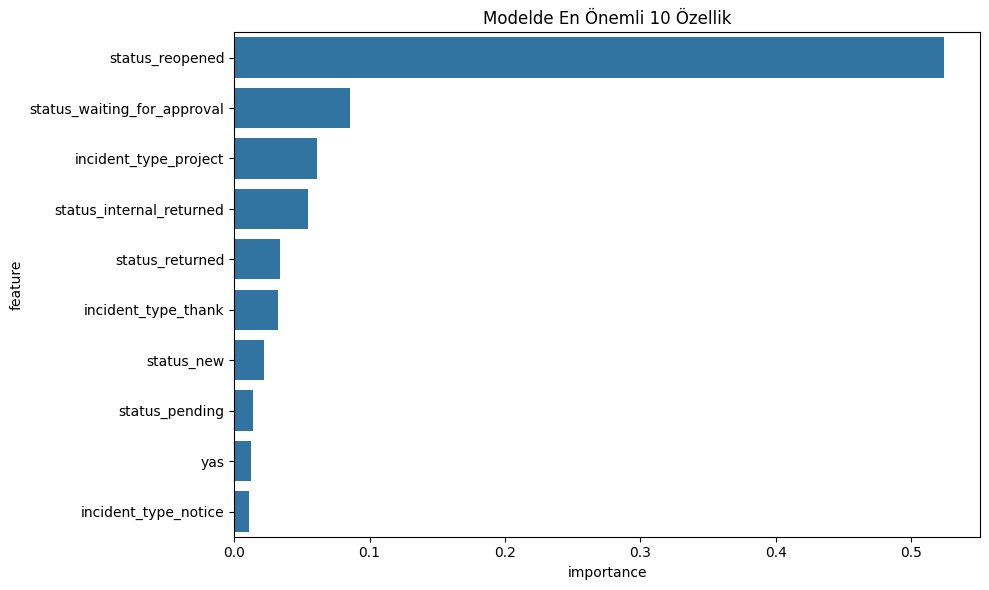


En yüksek talep potansiyeline sahip mahalleler:
     mahalle_id  talep_potansiyel_skoru
439      182881                  173.33
554      183303                  141.27
72        31790                  132.67
435      182873                  132.56
66        31781                   98.03
597      196565                   97.06
103       31826                   96.10
569      183345                   81.35
56        31771                   76.24
438      182879                   72.00


In [ ]:
# Gerekli kütüphaneleri içe aktar
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Dosyayı oku
df = pd.read_excel('incidentstable.xlsx')

# İlk inceleme
print("Veri seti boyutu:", df.shape)
print(df.dtypes)

# === 1. Feature Engineering ===
# Tarihleri datetime'a çevir
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month
df['day_of_week'] = df['created_at'].dt.dayofweek
df['hour'] = df['created_at'].dt.hour
df['yas'] = (pd.to_datetime('now') - pd.to_datetime(df['birth_date'])).dt.days // 365


# Gereksiz sütunları çıkar
drop_cols = ['id', 'created_at', 'updated_at', 'closed_at', 'mobile_phone',
             'name', 'last_name', 'identification_number', 'email',
             'birth_date', 'geogrophic_coordinate', 'original_id', 'completion_type']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Kategorik değişkenleri one-hot encoding ile dönüştür
categorical_cols = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Eksik değerleri 0 ile doldur (veya dilersen ortalama ile)
df.fillna(0, inplace=True)

# === 2. Modelleme için X, y ayır ===
# Hedef değişken: Mahalle bazlı toplam talep
talep_per_mahalle = df.groupby('mahalle_id').size().reset_index(name='talep_sayisi')

# Özellikleri mahalle bazında ortalama alarak özetle
X = df.drop(columns=['talep_id'], errors='ignore')
X_grouped = X.groupby('mahalle_id').mean().reset_index()

# X ile y'yi birleştir
data = pd.merge(X_grouped, talep_per_mahalle, on='mahalle_id')

X = data.drop(columns=['mahalle_id', 'talep_sayisi'])
y = data['talep_sayisi']

# === 3. Eğitim-Test ayır, ölçekle ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# === 4. Modeli eğit ===
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# === 5. Performans değerlendirmesi ===
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model R² skoru: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

# === 6. Özellik önemlerini görselleştir ===
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Modelde En Önemli 10 Özellik')
plt.tight_layout()
plt.show()

# === 7. Mahalle bazlı skorları hesapla ===
data['talep_potansiyel_skoru'] = model.predict(X_scaled)

# En yüksek potansiyelli mahalleler
print("\nEn yüksek talep potansiyeline sahip mahalleler:")
print(data[['mahalle_id', 'talep_potansiyel_skoru']].sort_values(by='talep_potansiyel_skoru', ascending=False).head(10))


Veri seti boyutu: (10000, 31)

Veri tipleri:
cadde_id                          int64
ilce_id                           int64
mahalle_id                        int64
id                                int64
incident_source_id                int64
original_id                     float64
master_incident_id                int64
topic_id                          int64
department_id                     int64
responsible_user_id               int64
creation_duration                 int64
created_at                       object
updated_at                       object
closed_at                        object
status                           object
priority                         object
il_id                             int64
dis_kapi_no                       int64
ic_kapi_no                        int64
geogrophic_coordinate            object
mobile_phone                      int64
name                             object
last_name                        object
identification_number             i

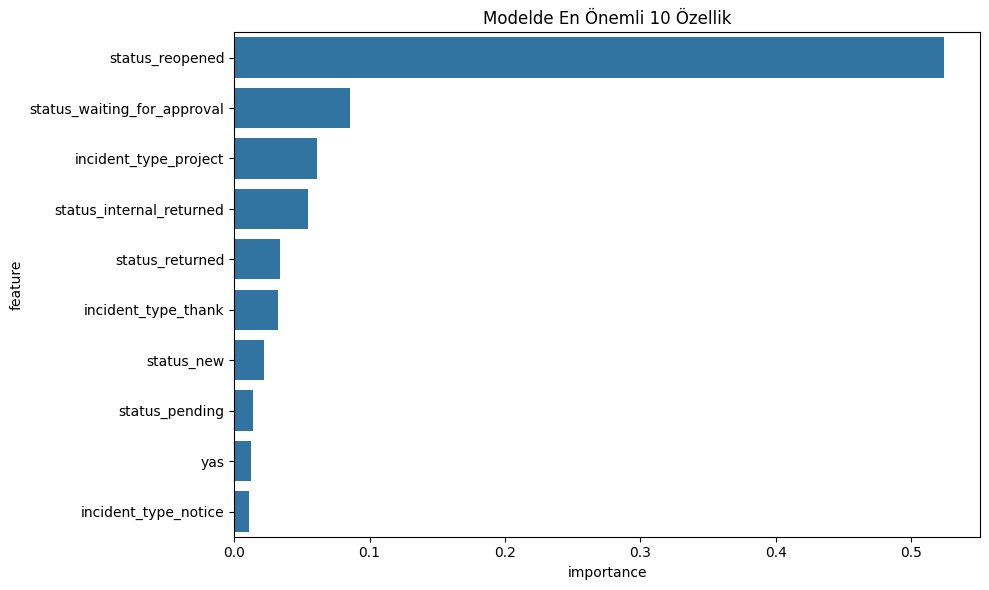


En yüksek talep potansiyeline sahip 10 mahalle:
     mahalle_id  talep_potansiyel_skoru
439      182881                  173.33
554      183303                  141.27
72        31790                  132.67
435      182873                  132.56
66        31781                   98.03
597      196565                   97.06
103       31826                   96.10
569      183345                   81.35
56        31771                   76.24
438      182879                   72.00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


# Dosyayı oku
df = pd.read_excel('incidentstable.xlsx')

# İlk inceleme
print("Veri seti boyutu:", df.shape)
print("\nVeri tipleri:")
print(df.dtypes)

# === 1. Feature Engineering ===
# Tarihleri datetime'a çevir
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month
df['day_of_week'] = df['created_at'].dt.dayofweek
df['hour'] = df['created_at'].dt.hour
df['yas'] = (pd.to_datetime('now') - pd.to_datetime(df['birth_date'], errors='coerce')).dt.days // 365

# Gereksiz sütunları çıkar
drop_cols = ['id', 'created_at', 'updated_at', 'closed_at', 'mobile_phone',
             'name', 'last_name', 'identification_number', 'email',
             'birth_date', 'geogrophic_coordinate', 'original_id', 'completion_type']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Kategorik değişkenleri one-hot encoding ile dönüştür
categorical_cols = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Eksik değerleri 0 ile doldur
df.fillna(0, inplace=True)

# === 2. Modelleme için X, y ayır ===
# Hedef değişken: Mahalle bazlı toplam talep
talep_per_mahalle = df.groupby('mahalle_id').size().reset_index(name='talep_sayisi')

# Özellikleri mahalle bazında ortalama alarak özetle
X = df.drop(columns=['talep_id'], errors='ignore')
X_grouped = X.groupby('mahalle_id').mean().reset_index()

# X ile y'yi birleştir (inner join kullanarak uyumsuzlukları önle)
data = pd.merge(X_grouped, talep_per_mahalle, on='mahalle_id', how='inner')

# Kontrol: Boyutlar eşleşiyor mu?
print(f"\nX_grouped boyutu: {X_grouped.shape}, talep_per_mahalle boyutu: {talep_per_mahalle.shape}")
print(f"Birleştirilmiş veri boyutu: {data.shape}")

X = data.drop(columns=['mahalle_id', 'talep_sayisi'])
y = data['talep_sayisi']

# === 3. Eğitim-Test ayır, ölçekle ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# === 4. Modeli eğit ===
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# === 5. Performans değerlendirmesi ===
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nModel R² skoru: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

# === 6. Özellik önemlerini görselleştir ===
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Modelde En Önemli 10 Özellik')
plt.tight_layout()
plt.show()

# === 7. Mahalle bazlı skorları hesapla ===
data['talep_potansiyel_skoru'] = model.predict(X_scaled)

# En yüksek potansiyelli mahalleler
print("\nEn yüksek talep potansiyeline sahip 10 mahalle:")
top_mahalleler = data[['mahalle_id', 'talep_potansiyel_skoru']].sort_values(by='talep_potansiyel_skoru', ascending=False).head(10)
print(top_mahalleler)

# Sonuçları CSV olarak kaydet (Colab'ta indirmek için)
top_mahalleler.to_csv('talep_potansiyeli_yuksek_mahalleler.csv', index=False)
feature_importance.to_csv('feature_importance.csv', index=False)

# Dosyaları indir
from google.colab import files
files.download('talep_potansiyeli_yuksek_mahalleler.csv')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from google.colab import files
import pickle


dataset = pd.read_excel('den1.xlsx')

# 2. Veri Ön İşleme
print("Veri ön işleme başlıyor...")
dataset['created_at_date'] = pd.to_datetime(dataset['created_at'])
dataset['month'] = dataset['created_at_date'].dt.month
dataset['year'] = dataset['created_at_date'].dt.year
dataset['day_of_week'] = dataset['created_at_date'].dt.dayofweek
dataset['hour'] = dataset['created_at_date'].dt.hour

# 3. Hedef Değişken Oluşturma
print("Hedef değişken oluşturuluyor...")
target_df = dataset.groupby(['mahalle_id', 'year', 'month']).size().reset_index()
target_df.columns = ['mahalle_id', 'year', 'month', 'incident_count']

# 4. Özellik Mühendisliği
print("Özellik mühendisliği yapılıyor...")
neighborhood_features = dataset.groupby('mahalle_id').agg({
    'topic_id': lambda x: x.value_counts().index[0],
    'incident_type': lambda x: x.value_counts().index[0],
    'priority': lambda x: x.value_counts().index[0],
    'status': lambda x: x.value_counts().index[0]
}).reset_index()

target_df = target_df.merge(neighborhood_features, on='mahalle_id', how='left')

# 5. Model Eğitimi
print("Model eğitimi başlıyor...")
X = target_df.drop('incident_count', axis=1)
y = target_df['incident_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = ['topic_id', 'incident_type', 'priority','status']
numeric_features = ['mahalle_id', 'year', 'month']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)

# 6. Gelecek Tahminleri
print("Gelecek tahminleri yapılıyor...")
future_months = 6
future_data = []
max_date = dataset['created_at_date'].max()

for i in range(1, future_months + 1):
    next_date = max_date + pd.DateOffset(months=i)
    future_month = next_date.month
    future_year = next_date.year

    for neighborhood in target_df['mahalle_id'].unique():
        recent_features = target_df[target_df['mahalle_id'] == neighborhood].iloc[-1]

        future_data.append({
            'mahalle_id': neighborhood,
            'year': future_year,
            'month': future_month,
            'topic_id': recent_features['topic_id'],
            'incident_type': recent_features['incident_type'],
            'priority': recent_features['priority'],
            'status': recent_features['status']
        })

future_df = pd.DataFrame(future_data)
future_predictions = model.predict(future_df)
future_df['predicted_incidents'] = future_predictions
future_df['month_year'] = future_df.apply(lambda x: f"{x['year']}-{x['month']:02d}", axis=1)

# 7. Önemli Özellikler
print("Özellik önemleri hesaplanıyor...")
feature_names = numeric_features + list(model.named_steps['preprocessor']
                                   .transformers_[1][1]
                                   .get_feature_names_out(categorical_features))
importances = model.named_steps['regressor'].feature_importances_
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# 8. Hotspot Mahalleler
print("Hotspot mahalleler belirleniyor...")
future_df_agg = future_df.groupby('mahalle_id')['predicted_incidents'].sum().reset_index()
hotspot_threshold = future_df_agg['predicted_incidents'].quantile(0.9)
hotspots = future_df_agg[future_df_agg['predicted_incidents'] >= hotspot_threshold]

# 9. Sonuçları Kaydetme
print("Sonuçlar kaydediliyor...")
# Tahminleri CSV olarak kaydet
future_df.to_csv('future_predictions.csv', index=False)
# Modeli kaydet
with open('incident_model.pkl', 'wb') as f:
    pickle.dump(model, f)
# Özellik önemlerini kaydet
feature_importance.to_csv('feature_importance.csv', index=False)
# Hotspotları kaydet
hotspots.to_csv('hotspot_neighborhoods.csv', index=False)

# Dosyaları indir
files.download('future_predictions.csv')
files.download('incident_model.pkl')
files.download('feature_importance.csv')
files.download('hotspot_neighborhoods.csv')

print("İşlem başarıyla tamamlandı! Lütfen indirilen dosyaları Power BI'a yükleyin.")

Veri ön işleme başlıyor...
Hedef değişken oluşturuluyor...
Özellik mühendisliği yapılıyor...
Model eğitimi başlıyor...
Gelecek tahminleri yapılıyor...
Özellik önemleri hesaplanıyor...
Hotspot mahalleler belirleniyor...
Sonuçlar kaydediliyor...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

İşlem başarıyla tamamlandı! Lütfen indirilen dosyaları Power BI'a yükleyin.
